<a href="https://colab.research.google.com/github/unknown-jun/First_step_of_data_analist/blob/master/K_Beauty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


**1. K-Beauty는 성장하고 있을까? 해외 직접 판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?**


*   e : 추정치
*   p : 잠정치
*   -: 자료없음
*  ... : 미상자료
*  x : 비밀보호 추가

#**2. 필요 라이브러리가져오기**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()



%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving 국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200923140806.csv to 국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200923140806 (7).csv


In [ ]:
# 시각화를 위한 폰트 설정
import os

if os.name == 'posix':
  sns.set(font='AppleGothic')

%config InlineBackened.figure_format ='retina'


import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)



NanumGothic Eco


#**3. 데이터로드하기**



In [ ]:
df_raw = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200923140806.csv',
                     encoding="cp949")
df_raw.shape

(450, 29)

In [ ]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

일본            45
중국            45
합계            45
중남미           45
중동            45
대양주           45
기타            45
아세안(ASEAN)    45
미국            45
EU            45
Name: 국가(대륙)별, dtype: int64

In [ ]:
  # 미국 데이터만 따로 보기
  # df_raw['국가(대륙)별'] == "미국"로 치면 boolin로 나타나고
  # 한번 더 df_raw[df_raw['국가(대륙)별'] == "미국"] 처럼 df 감싸주면 
  # 데이터 프레임 형태로 나옴
  
  df_raw[df_raw['국가(대륙)별'] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848,48277,63218
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481,698,339
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367,47579,62879
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1382,1182,1594
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,1054,946,791,854,2033,1553,1784,1773,1298,1408,1653,1382,1182,1594
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785,1830,2759
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49,12,2
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736,1818,2757
54,미국,소프트웨어,계,47,57,49,128,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338,135,182


#**4. 분석과 시각화를 위한 tidy data 만들기**


In [ ]:
df=df_raw.melt(id_vars=["국가(대륙)별","상품군별", "판매유형별"], 
            var_name="기간", value_name="백만원")
df.shape

(11700, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  11700 non-null  object
 1   상품군별     11700 non-null  object
 2   판매유형별    11700 non-null  object
 3   기간       11700 non-null  object
 4   백만원      11700 non-null  object
dtypes: object(5)
memory usage: 457.2+ KB


In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


# **5. 데이터 전처리**

##**5.1 기간에서 연도를 분리**

In [ ]:
# '2020 2/4 p)'.split()[0]의 값인 '2020'은 str 타입이다.
# 이는 ''로 인한 것이기에 데이터 처리를 용이하기 위해서
# int 타입으로 변경

int('2020 2/4 p)'.split()[0])

2020

In [ ]:
# 연도 column을 만들고 그 value 값으로
# 기간에 있는 연도만을 추출
# 이를 위해서 lambda 함수로 공백을 indexing 한 후에
# [0]만을 추출 후 이를 int타입으로 바꿔줌

df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [ ]:
'2020 2/4 p)'.split()[1].split('/')[0]

'2'

In [ ]:
# 기간에서 분기를 분리
df['분기']=df["기간"].map(lambda x: int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


##**5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기**

In [ ]:
# - 문자로 결측치를 변경하고 float 타입으로 변경하기
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


#**5.3 필요없는 데이터 제거하기**

In [ ]:
# 결측치보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3600
연도            0
분기            0
dtype: int64

In [ ]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df["국가(대륙)별"] !=  "합계") & (df["상품군별"] != "합계")].copy()

In [ ]:
# info로 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 48 to 11699
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9828 non-null   object 
 1   상품군별     9828 non-null   object 
 2   판매유형별    9828 non-null   object 
 3   기간       9828 non-null   object 
 4   백만원      6804 non-null   float64
 5   연도       9828 non-null   int64  
 6   분기       9828 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 614.2+ KB


#**6. K-Beauty 시각화**


## **6.1 전체 상품군 판매액**

In [ ]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지만 
# 평균값을 구하는 그래프를 올바른 값으로 표시 가능
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


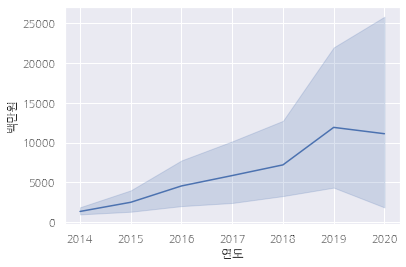

In [ ]:
# 연도 , 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x="연도", y="백만원")

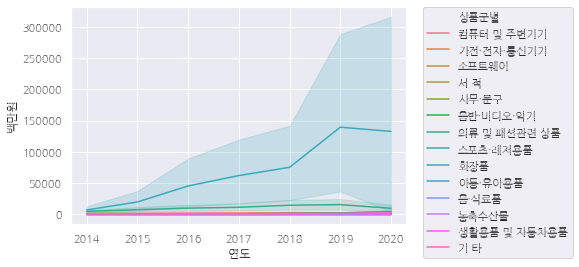

In [ ]:
# 연도, 금액(million) 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시
sns.lineplot(data=df_total , x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

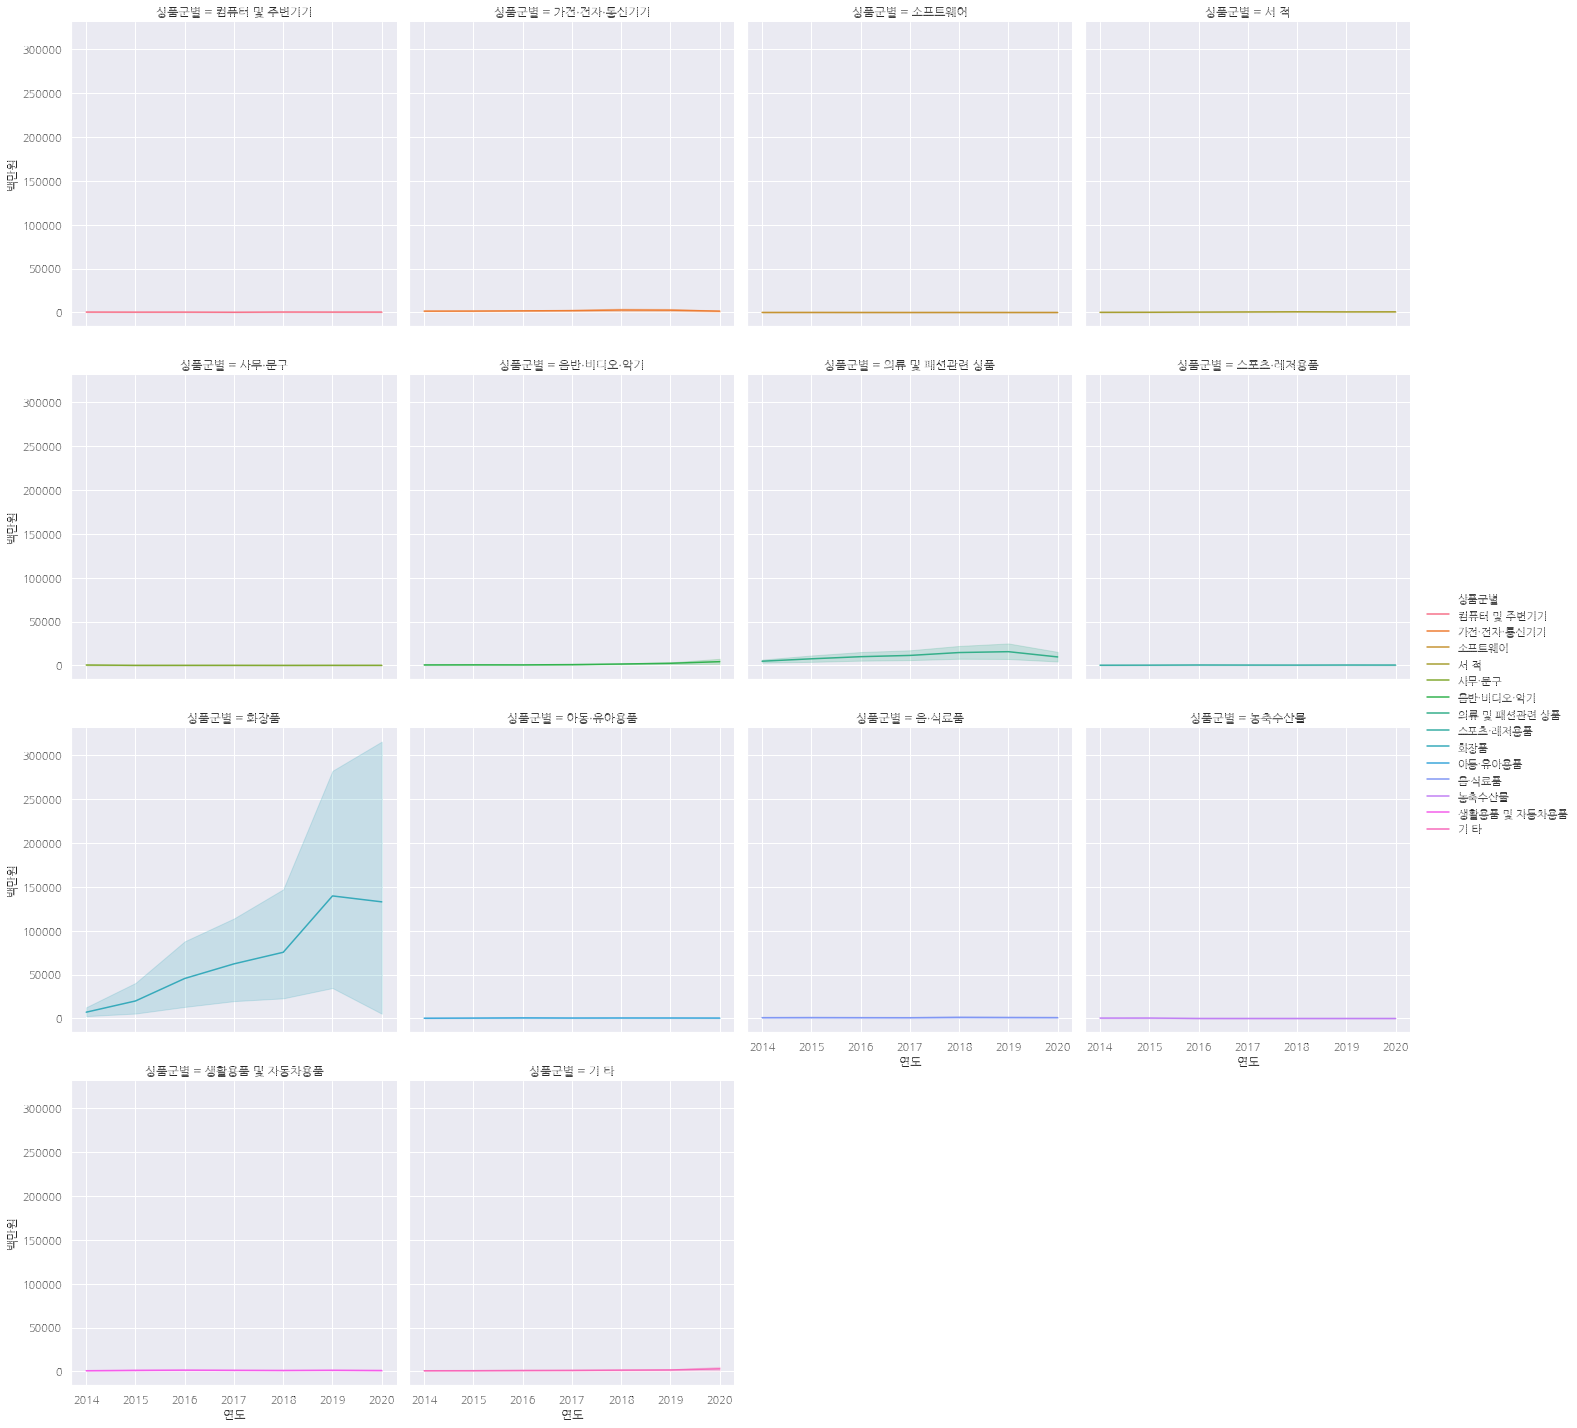

In [ ]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시
sns.relplot(data=df_total, x="연도", y="백만원", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [ ]:
# isin을 사용해 화장품만 제외를 하고 df_sub 이라는 변수에 담음

In [ ]:
# 연도별 판매액을 상품별로 replot을 활용해 서브플롯으로 그려보기

##**6.2 화장품의 온라인쇼핑 해외직접판매액**

In [ ]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기

In [ ]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 변경

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하기

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기

##**6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액**

In [ ]:
#df_fashion 이라는 변수에 의해 의류 데이터만 가져와 따로 담아주기

In [ ]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별"로 다른 색상으로 표시하기


In [ ]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기


##**6.4 데이터 집계하기**

In [ ]:
# 피벗데이블로 "국가(대륙)별", "연도별" 합계 금액을 표 형태로 구하기

##**6.5 연산결과를 시각적으로 보기**

In [ ]:
# 피벗테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기

#**7. 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?**

In [ ]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

In [ ]:
# 위에서 구한 데이터에는 2014~2016년 데이터는 합계만 있기 때문에
# 합계 데이터만 다시 가져와서 그리기

In [ ]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기